<a href="https://colab.research.google.com/github/hyturing/Machine-Learning/blob/main/mnist_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

array = mnist.load_data()

train_images, train_labels = array[0]
test_images, test_labels = array[1]

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))

# checking if commit works

In [3]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

train_images.shape

(60000, 784)

In [5]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=7d9ef6b30981fcf51f3b32d2509a71c5448afade76e3b4857e289334681d7e4c
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels.shape

(60000, 10)

In [8]:
network.fit(train_images, train_labels, epochs = 100, batch_size=128)


Epoch 1/100
469/469 [==============================] - 5s 9ms/step - loss: 0.2545 - accuracy: 0.9270
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1018 - accuracy: 0.9704
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0677 - accuracy: 0.9796
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0489 - accuracy: 0.9843
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0373 - accuracy: 0.9891
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0284 - accuracy: 0.9918
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0212 - accuracy: 0.9939
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0170 - accuracy: 0.9950
Epoch 9/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0127 - accuracy: 0.9961
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0097 - accura

In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc, test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.1519 - accuracy: 0.9826
0.9825999736785889 0.15189942717552185


In [10]:
ans = network.predict(test_images)

In [11]:
ans[0]


array([8.9186262e-28, 0.0000000e+00, 1.3246995e-29, 1.2758974e-20,
       2.2957644e-38, 2.2687134e-32, 0.0000000e+00, 1.0000000e+00,
       4.5731473e-32, 6.6602658e-24], dtype=float32)

In [12]:
from google.colab import files
uploaded = files.upload()

Saving download.png to download.png


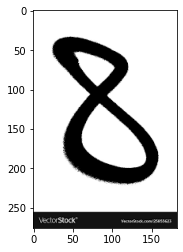

In [13]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('download.png', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [14]:
# img = img.reshape((1, 28*28))
# img = img.astype('float32')/255

img.shape

(276, 182, 3)

In [15]:
import numpy as np
from PIL import Image
import cv2

img_pil = Image.fromarray(img)
img_new = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

rgb_weights = [0.2989, 0.5870, 0.1140]

img_new = np.dot(img_new[...,:3], rgb_weights)
img_new.shape

(28, 28)

In [16]:
img_new = img_new.reshape((1, 28*28))
img_new = img_new.astype('float32')/255

In [17]:
x = network.predict(img_new)
# x = list(x)
# mx = -1;
# t = 0;

# for i in range(len(x)):
#   if(x[i] > mx):
#     mx = x[i]
#     t = i
# print(t)

x

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)